In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML

##Choose appropiate Color palette

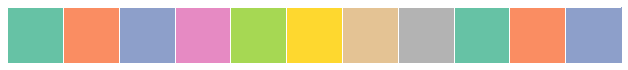

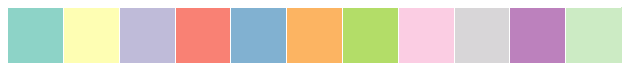

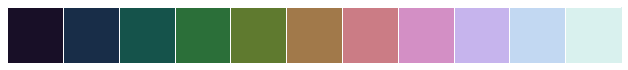

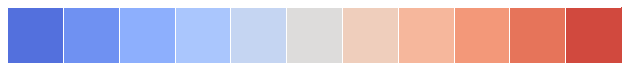

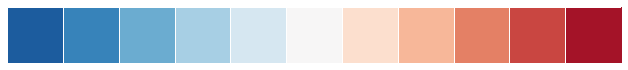

In [4]:
#Test out different color palettes
sns.palplot(sns.color_palette("Set2", 11))
sns.palplot(sns.color_palette("Set3", 11))
sns.palplot(sns.color_palette("cubehelix", 11))
sns.palplot(sns.color_palette("coolwarm", 11))
sns.palplot(sns.color_palette("RdBu_r", 11))

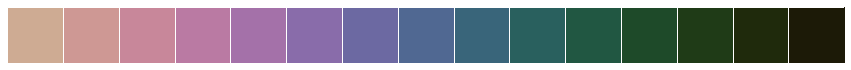

In [5]:
sns.palplot(sns.cubehelix_palette(15, start=1., rot=1.5, dark=0.1, light=.7, reverse=False))

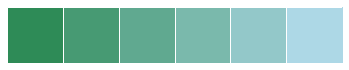

In [6]:
sns.palplot(sns.blend_palette(["seagreen", "lightblue"]));

In [7]:
#save them for use in function
pal1 = sns.color_palette('Set2', 11)
pal2 = sns.cubehelix_palette(11, start=0, rot=3, dark=0.3, light=.7, reverse=True)
pal3 = sns.color_palette("coolwarm", 11)
pal4 = sns.cubehelix_palette(11, start=1., rot=1.5, dark=0.1, light=.7, reverse=False)
pal5 = sns.color_palette("RdBu_r", 11)
pal6 = sns.blend_palette(["#5470de", "#d1493f"], 11)

In [8]:
pal3.as_hex()

[u'#5470de',
 u'#6f92f3',
 u'#8db0fe',
 u'#aac7fd',
 u'#c5d6f2',
 u'#dddcdc',
 u'#efcebd',
 u'#f7b89c',
 u'#f4987a',
 u'#e7745b',
 u'#d1493f']

##Generate the colored parentheses

In [9]:
teststring = "((()(()())(((((((())))))))))"

In [44]:
def parse_paren(some_string, some_palette):
    color_codes = {i:v for i,v in enumerate(some_palette.as_hex())}
    html_parse = '<div style="font-size:18pt">'
    depth = 0
    for c in some_string:
        if c == "(":
            #print " "*depth,"("
            html_parse += '<span style="color:{0};">(</span>'.format(color_codes[depth])
            depth+=1
            
        else:
            depth-=1
            html_parse += '<span style="color:{0};">)</span>'.format(color_codes[depth])

            #print " "*depth,")"
    html_parse += "</div>"
    return HTML(html_parse)

parse_paren(teststring, pal5)

##Read Language

In [11]:
text_file = open("dyck-0.9-test.txt", "r")
lines = text_file.read()
parse_paren(lines, pal5)

##Generate Sized Parentheses

In [62]:
def parse_paren_size(some_string, some_palette):
    color_codes = {i:v for i,v in enumerate(some_palette.as_hex())}
    html_parse = '<div style="line-height: 30px">'
    depth = 0
    for c in some_string:
        if c == "(":
            html_parse += '<span style="color:{0};font-size:{1}pt">(</span>'.format(color_codes[depth], 30-2*depth)
            depth+=1
        else:
            depth-=1
            html_parse += '<span style="color:{0};font-size:{1}pt">)</span>'.format(color_codes[depth], 30-2.5*depth)

    html_parse += "</div>"
    return HTML(html_parse)

In [63]:
parse_paren_size(lines, pal2)

##Line Plot for Depth

In [12]:
def parse_paren_depth(some_string):
    depth = 0
    depths = []
    for c in some_string:
        if c == "(":
            depth+=1   
        else:
            depth-=1    
        depths.append(depth)
    return depths

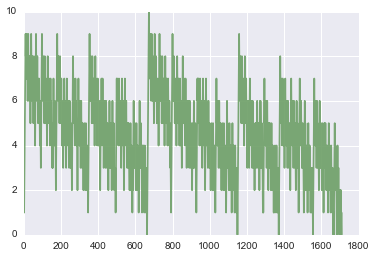

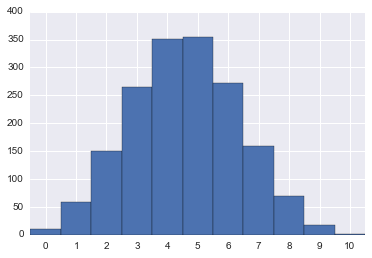

In [88]:
depth_array = parse_paren_depth(lines)
plt.plot(depth_array, color=pal2.as_hex()[6], alpha=.9)
plt.show()
counts = np.bincount(depth_array)
fig, ax = plt.subplots()
ax.bar(range(11), counts, width=1, align='center')
ax.set(xticks=range(11), xlim=[-.5, 10.5])
plt.show()